In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [3]:
#Generate salaries
normal_salaries = np.random.normal(loc = 50000, scale = 15000, size = 1000)

# Introduce anomalies
anomalies = np.random.uniform(low = 200000, high = 300000, size = 10)
anomalies = np.append(anomalies, np.random.uniform(low = 10000, high = 20000, size = 10))

#Combine the two
salaries = np.concatenate([normal_salaries,anomalies])

In [4]:
df = pd.DataFrame({'salaries' : salaries})
df.head()

,salaries
0,68141.520625
1,49293.637847
2,-2480.441935
3,32704.704014
4,49673.030362


<function matplotlib.pyplot.show(close=None, block=None)>

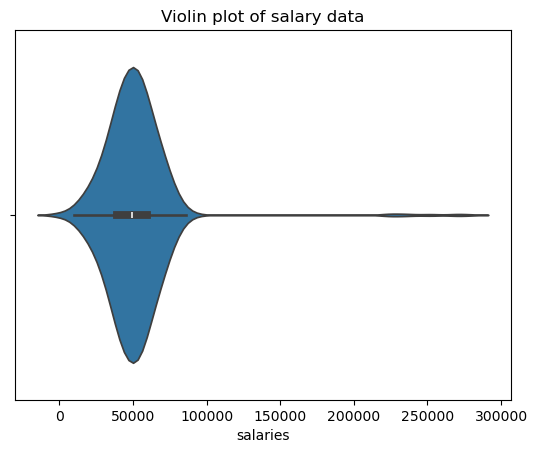

In [6]:
sns.violinplot(x=df['salaries'])
plt.title('Violin plot of salary data')
plt.show

In [8]:
model = IsolationForest(n_estimators=100, max_samples='auto', contamination= 0.1, max_features= 1.0, 
                        bootstrap=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)
model.fit(df[['salaries']])

IsolationForest(contamination=0.1)

In [9]:
df['anomaly'] = model.predict(df[['salaries']])
df['anomaly'] = df['anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')
df.head()

,salaries,anomaly
0,68141.520625,Normal
1,49293.637847,Normal
2,-2480.441935,Anomaly
3,32704.704014,Normal
4,49673.030362,Normal


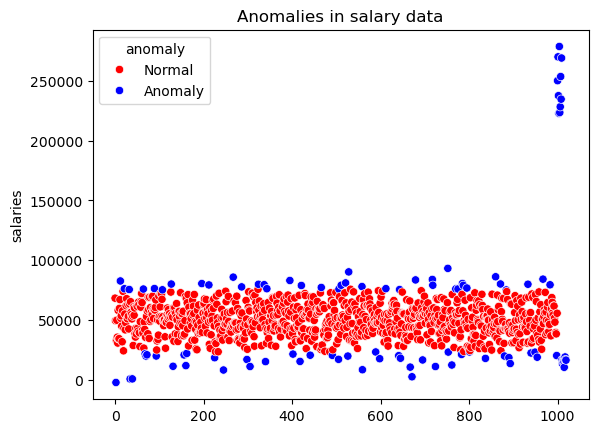

In [10]:
sns.scatterplot(x=range(len(df)), y='salaries', hue= 'anomaly', data= df, palette=['red','blue'])
plt.title("Anomalies in salary data")
plt.show()